In [1]:
from codecarbon import EmissionsTracker
try:
    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
except:
    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 18:39:31] [setup] RAM Tracking...
[codecarbon INFO @ 18:39:31] [setup] CPU Tracking...
[codecarbon WARNING @ 18:39:34] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 18:39:35] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 18:39:35] [setup] GPU Tracking...
[codecarbon INFO @ 18:39:35] No GPU found.
[codecarbon INFO @ 18:39:35] >>> Tracker's metadata:
[codecarbon INFO @ 18:39:35]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 18:39:35]   Python version: 3.9.12
[codecarbon INFO @ 18:39:35]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 18:39:35]   Available RAM : 8.000 GB
[codecarbon INFO @ 18:39:35]   CPU count: 8
[codecarbon INFO @ 18:39:35]   CPU model: Apple M1
[codecarbon INFO @ 18:39:35]   GPU count: None
[codecarbon INFO @ 18:39:35]   GPU model: None
[codecarbon INFO @ 18:39:38] Saving emissions data to

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [3]:
data = '/Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2/donateacry-corpus_features_final.csv'

df = pd.read_csv(data)

In [4]:
col_names = df.columns

col_names

Index(['Cry_Audio_File', 'Cry_Reason', 'Amplitude_Envelope_Mean', 'RMS_Mean',
       'ZCR_Mean', 'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean',
       'MFCCs13Mean', 'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20',
       'MFCCs1', 'MFCCs2', 'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7',
       'MFCCs8', 'MFCCs9', 'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13'],
      dtype='object')

In [5]:
df = df.drop(columns=['Cry_Audio_File'])

In [6]:
X = df.drop(['Cry_Reason'], axis=1)

y = df['Cry_Reason']

In [7]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
cols = X_train.columns

In [9]:
from sklearn.preprocessing import StandardScaler

# Crear un StandardScaler
scaler = StandardScaler()

# Identificar columnas numéricas
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Normalizar solo las columnas numéricas de X_train y X_test
X_train_scaled = X_train.copy()  # Copia del dataset original
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Mostrar resultados
print("X_train con variables numéricas normalizadas:")
print(X_train_scaled.head())

print("X_test con variables numéricas normalizadas:")
print(X_test_scaled.head())

X_train con variables numéricas normalizadas:
     Amplitude_Envelope_Mean  RMS_Mean  ZCR_Mean  STFT_Mean   SC_Mean  \
141                 0.714945  0.942063 -0.110950   1.065452  1.434787   
335                -0.049804  0.008187 -0.878531  -0.320930 -0.720805   
312                -0.113423 -0.179947  0.045621  -0.390065  0.132048   
173                 0.951887  0.696316  0.215921   0.381607 -0.036278   
238                 0.268700  0.210858  0.378691  -0.209300  0.898216   

     SBAN_Mean  SCON_Mean  MFCCs13Mean  delMFCCs13  del2MFCCs13  ...  \
141   0.117665   1.153843     0.558078   -0.462878    -0.408958  ...   
335  -0.130458  -0.688644     0.039125    0.839507    -1.489224  ...   
312   0.895263   1.295201     0.642349   -0.849176     0.098937  ...   
173  -0.125341   0.617127     0.626175    0.618569    -0.491722  ...   
238   1.257767   0.985377     0.167813   -0.509977    -0.316045  ...   

       MFCCs4    MFCCs5    MFCCs6    MFCCs7    MFCCs8    MFCCs9   MFCCs10  \
141 -

In [10]:
X_train = X_train_scaled
X_train

,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,del2MFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
141,0.714945,0.942063,-0.110950,1.065452,1.434787,0.117665,1.153843,0.558078,-0.462878,-0.408958,...,-0.389834,-0.604658,0.656641,0.033518,-0.602265,0.700164,1.300260,1.314810,1.673099,1.321711
335,-0.049804,0.008187,-0.878531,-0.320930,-0.720805,-0.130458,-0.688644,0.039125,0.839507,-1.489224,...,-1.645092,-1.205262,-0.881981,-0.390749,0.473803,0.618999,0.603080,-0.319405,-0.700491,-0.743220
312,-0.113423,-0.179947,0.045621,-0.390065,0.132048,0.895263,1.295201,0.642349,-0.849176,0.098937,...,0.237490,0.130649,0.110587,-1.516862,-2.387735,-0.420341,0.597841,-1.082793,-0.658584,0.295999
173,0.951887,0.696316,0.215921,0.381607,-0.036278,-0.125341,0.617127,0.626175,0.618569,-0.491722,...,-0.709917,-0.105619,-0.124953,-0.346337,-0.407859,-0.478184,0.528442,1.860864,0.737559,-0.093053
238,0.268700,0.210858,0.378691,-0.209300,0.898216,1.257767,0.985377,0.167813,-0.509977,-0.316045,...,-0.718110,1.137896,-0.797264,-1.996297,-0.547359,0.341349,2.002511,0.969723,-2.279310,-0.999286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.754332,-0.684997,0.114136,-0.613448,0.007143,-0.975801,0.065156,-1.008848,1.074313,-0.615198,...,-1.406085,-0.714972,0.565385,0.055622,-0.157095,0.554263,-0.084731,-0.581410,0.224313,0.058309
270,-0.377248,-0.278433,-0.709308,-0.318462,-0.957890,0.694520,2.398256,0.643209,1.140879,-0.561450,...,1.696700,2.538074,2.244388,0.043707,-0.868489,0.736622,0.017545,-1.360472,-0.948383,-1.366721
348,-1.190487,-1.127167,1.325976,-0.668634,1.270944,3.701805,0.065513,-2.893439,1.792287,-0.957314,...,1.824122,1.451073,1.134191,1.530409,0.434777,-0.254421,0.061860,0.381014,0.186833,0.093196
435,-0.327982,-0.202160,-0.092224,-0.413107,-0.580457,-0.754691,0.833941,0.159203,1.245837,1.648486,...,-0.055313,0.730835,0.189785,-0.499587,-0.343800,-0.225397,-0.736463,-0.598802,-0.161726,-1.044700


In [11]:
X_test = X_test_scaled
X_test

,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,del2MFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
304,1.399000,1.806859,-0.929447,1.854555,-0.831945,-0.709323,0.894303,1.317513,-0.355063,-0.285898,...,-1.364388,-0.943722,0.454203,-0.138238,-0.784213,-0.744486,-1.770003,-0.015903,3.010729,4.584063
39,-0.858473,-0.865597,0.832401,-0.627180,0.155726,1.267913,1.502363,-0.792182,0.246704,2.867713,...,-0.194487,-1.238145,-0.650944,1.166471,0.292372,-1.075130,-0.350603,-1.703488,-2.872128,-1.459090
341,1.763686,1.955805,0.195276,0.923473,-0.019143,-0.691468,0.606534,0.635870,1.234689,1.206688,...,-1.350516,0.298753,-0.743767,-1.273296,-0.097246,-0.526189,-1.185935,-0.810228,-0.989624,-0.724396
218,-0.226880,-0.093616,-1.119233,-0.257274,-0.974431,-0.905902,0.565365,0.096470,0.506929,0.459593,...,-1.450530,-1.512046,0.181219,-1.296848,-0.596447,0.811535,-1.201057,-1.050877,-0.038541,-2.436566
155,0.967497,0.912288,0.201084,0.469335,0.594719,0.649963,0.111755,0.258912,-0.545153,-0.361650,...,-0.223084,-0.768766,-1.501170,0.397753,1.697665,-1.244986,-2.269754,0.528348,0.435514,1.847348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.377657,0.940828,-1.126673,1.635234,-0.812741,-1.629700,-0.024096,0.767657,-0.027804,0.273472,...,0.511777,0.923387,1.640248,0.182945,-0.467279,0.925862,0.618490,0.776141,1.302216,0.509725
157,-0.160808,0.119487,-0.817608,0.057279,-1.114522,-0.956035,1.016089,0.149349,0.234364,0.090586,...,0.194714,-0.703865,0.065701,0.133096,-0.061690,-0.328595,-0.977469,0.054412,0.450582,0.144648
175,-0.799484,-0.756691,-0.738921,-0.597778,-0.447042,0.118732,-0.762216,-0.317910,0.811887,-0.073231,...,0.088571,-0.179406,0.334741,0.471274,0.481554,0.703758,0.152656,-0.076227,0.633489,0.449785
229,-0.429471,-0.565152,-0.412928,-0.548441,-0.912534,-1.373239,-0.761091,-0.603360,-1.668912,-0.893546,...,0.357157,-0.110163,-0.749101,-1.077641,-0.574301,-0.038933,0.834252,1.006431,-0.079932,-0.804706


MODELO

In [12]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=10, random_state=42)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7947


In [13]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7881


El mejor modelo es con 10 decision trees

In [14]:
# create the classifier with n_estimators = 500
clf = RandomForestClassifier(n_estimators=500, random_state=42)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [15]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

MFCCs8                     0.054801
del2MFCCs13                0.048747
delMFCCs13                 0.048288
MFCCs11                    0.047099
MFCCs4                     0.046095
MFCCs9                     0.045586
MFCCs2                     0.044434
MFCCs1                     0.043474
MFCCs5                     0.042571
MelSpec                    0.041796
STFT_Mean                  0.041389
MFCCs20                    0.039936
MFCCs6                     0.039042
MFCCs13                    0.038460
MFCCs12                    0.038057
SCON_Mean                  0.037739
MFCCs3                     0.037609
SBAN_Mean                  0.036356
MFCCs13Mean                0.036122
MFCCs7                     0.034867
Amplitude_Envelope_Mean    0.034642
RMS_Mean                   0.033325
MFCCs10                    0.031853
ZCR_Mean                   0.029182
SC_Mean                    0.028533
dtype: float64

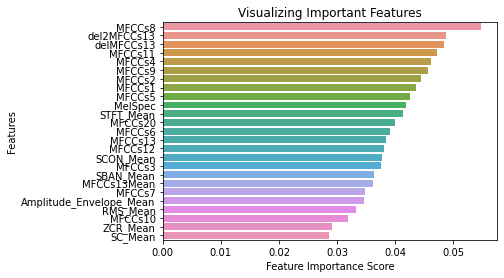

In [16]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [17]:
# declare feature vector and target variable

X_test = X_test.drop(['SC_Mean', 'ZCR_Mean', 'MFCCs10'], axis=1)
X_train = X_train.drop(['SC_Mean', 'ZCR_Mean', 'MFCCs10'], axis=1)

In [18]:
# instantiate the classifier with n_estimators = 10

clf = RandomForestClassifier(n_estimators=10, random_state=42)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)


# Check accuracy score 

print('Model accuracy score with variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with variable removed : 0.7682


In [19]:
# declare feature vector and target variable

X_test = X_test.drop(['RMS_Mean'], axis=1)
X_train = X_train.drop(['RMS_Mean'], axis=1)

In [20]:
# instantiate the classifier with n_estimators = 10

clf = RandomForestClassifier(n_estimators=10, random_state=42)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)


# Check accuracy score 

print('Model accuracy score with variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with variable removed : 0.7947


In [21]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0   0   7   0]
 [  0   0   0   5   0]
 [  0   0   2   9   0]
 [  0   0   1 118   0]
 [  0   0   0   9   0]]


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         5
           2       0.67      0.18      0.29        11
           3       0.80      0.99      0.88       119
           4       0.00      0.00      0.00         9

    accuracy                           0.79       151
   macro avg       0.29      0.23      0.23       151
weighted avg       0.68      0.79      0.72       151



/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Sensibilidad (Recall)
sensibilidad = recall_score(y_test, y_pred, average='weighted')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC (usamos predict_proba y opción multiclase)
try:
    auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='weighted')
except ValueError:
    auc = "No se puede calcular AUC (verifica que clf tenga predict_proba o que las clases estén bien definidas)"

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensibilidad (Recall): {sensibilidad:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc}")


Accuracy: 0.7947
Sensibilidad (Recall): 0.7947
F1 Score: 0.7174
AUC: 0.5873045788312586


In [24]:
# Detener el medidor y obtener los resultados
tracker.stop()

[codecarbon INFO @ 18:39:40] Energy consumed for RAM : 0.000002 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:39:40] Energy consumed for all CPUs : 0.000004 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:39:40] 0.000006 kWh of electricity used since the beginning.


1.0504852717063333e-06